# Concepto de filtros pasa baja con aproximación Chebyshev

In [1]:
#NOTE importar bibliotecas
import sympy as sym

import numpy             as np
import matplotlib.pyplot as plt

from scipy import signal
from sympy import Poly   as poly

In [2]:
def cheby_poly(n,N,Tn,Tnp,X):
    Tnx = 0
    if n < N-1:
        Tnx = 2*w*Tn - Tnp
        cheby_poly(n+1,N,Tnx,Tn,X)
        X.append(Tnx)

In [3]:
def freqs_bode(sy):
    w, mag, phase = signal.bode(sy)
    
    plt.figure(figsize=(15,5))
    plt.semilogx(w, mag,linewidth=3)
    plt.grid(True)
    
    plt.figure(figsize=(15,5))
    plt.semilogx(w, phase, linewidth=3, color='orange')
    plt.grid(True)
    plt.show()

# Definicion de funcion para graficar respuesta en frecuencia del filtro
def freqz_plot(b,a,sr):
    w, h = signal.freqz(b,a)
    h[h==0] = 1E-5
    
    H    = 20*np.log10( np.abs(h) )
    W    = np.angle  (h)
    W    = np.unwrap (W)
    W    = np.degrees(W)
    w    = np.linspace(0,sr/2,H.shape[0] )
    
    return w, W, H

In [4]:
R_db = 1.
wp   = 50.
ws   = 90.
A    = 10.

In [8]:
eps    = np.sqrt( np.power( 10,R_db/10 ) - 1 )
n_tmp  = ( np.arccosh(  np.sqrt(  (A**2 - 1)/eps**2  )  )/
           np.arccosh(  ws/wp ) )
n      = np.ceil(n_tmp)

print('eps: {:4.4f}, n: {:4.4f}, n: {:d}'.format( eps,n_tmp,int(n) )  )

eps: 0.5088, n: 3.0729, n: 4


r0=1.0427, r1=0.2953


/usr/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


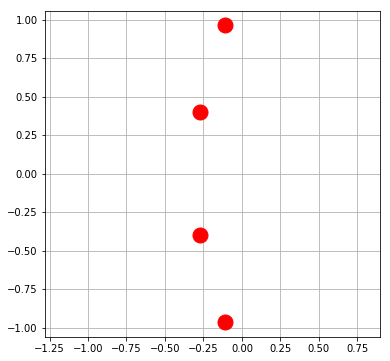

In [9]:
k   = np.arange(1,n+1)

G = (  1 + np.sqrt( 1 + eps**2 )/eps  )
G = G**(1./n)

r0 = ( G**2 + 1 )/(2*G)
r1 = ( G**2 - 1 )/(2*G)

print ('r0={:6.4f}, r1={:6.4f}'.format(r0,r1))

p  = np.pi*(2*k + n - 1 )/(2*n)

plt.figure(figsize=(6,6))
plt.plot(  r1*np.cos(p),r0*np.sin(p),'ro',markersize=15 )
plt.axes().set_aspect('equal', 'datalim')
plt.grid(True)
plt.show() 

In [10]:
for i,j in zip( r1*np.cos(p),r0*np.sin(p) ):
    print( '{:7.4f} + {:7.4f}j'.format(i,j) )

-0.1130 +  0.9633j
-0.2728 +  0.3990j
-0.2728 + -0.3990j
-0.1130 + -0.9633j


In [11]:
s, z = sym.symbols('s z')
sh   = int( p.shape[0]/2 )

spkr, spki = r1*np.cos(p[:sh]), 1j*r0*np.sin(p[:sh])

P = []
for pkr, pki in zip(spkr,spki):
    pk = ( s-( pkr + pki ) )*( s-( pkr - pki ) )
    P  .append(pk.expand() )
    print(     pk.expand() )

if p.shape[0]%2 != 0:
    P.append( s-r1*np.cos( p[p.shape[0]%2 + 1] ) )
    print( P[-1] )

s**2 + 0.226021829108948*s + 0.940762420970812
s**2 + 0.545664965227197*s + 0.233655639784265


In [12]:
den = 1.
for p in P:
    den *= p

print( den.expand() )
coef = poly( den.expand() ).all_coeffs()
coef = np.array(coef).astype('float')

1.0*s**4 + 0.771686794336146*s**3 + 1.2977502542764*s**2 + 0.566152368811753*s + 0.219814445356929


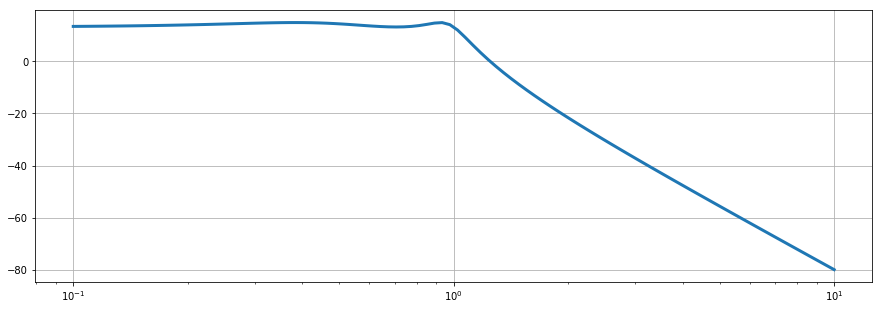

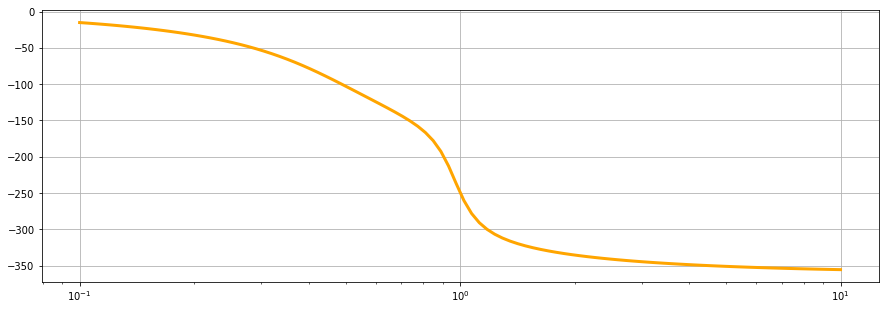

In [13]:
sy = signal.lti( [1],coef )

freqs_bode(sy)

In [16]:
den = 1.
for p in P:
    den *= p

coef = poly(  ( den ).subs( {s:s/(wp)} )  ).all_coeffs()
coef = np.array(coef).astype('float')
coef

array([  1.60000000e-07,   6.17349435e-06,   5.19100102e-04,
         1.13230474e-02,   2.19814445e-01])

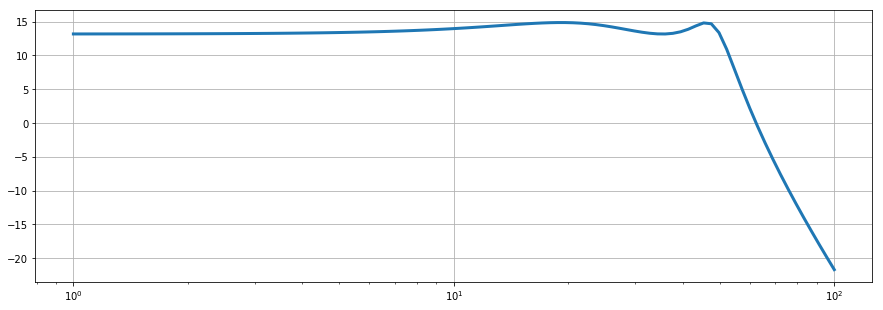

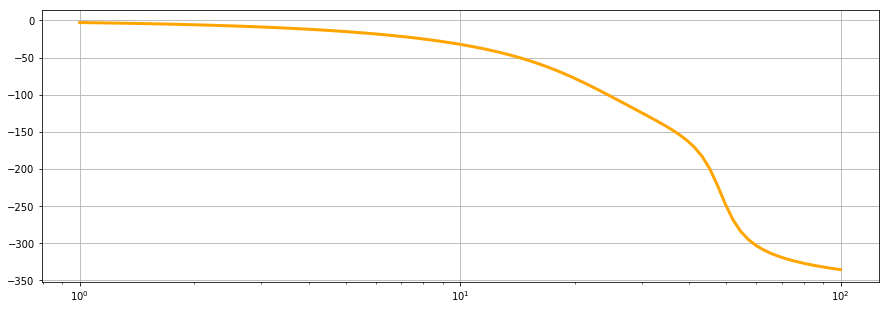

In [17]:
sy = signal.lti( [1],coef )
freqs_bode(sy)

In [18]:
den = 1.
for p in P:
    den *= p

#coef = poly(  ( 1/den ).subs( {s:wp/s} )  )
#coef = (  den.subs( {s:wp/s} )  ).expand()
coef = (  den.subs( {s:(4*s)/(s**2+48*52)} )  ).expand()
print( '{},\n'.format(coef) )

256.0*s**4/(s**8 + 9984*s**6 + 37380096*s**4 + 62200479744*s**2 + 38813099360256) + 49.3879548375133*s**3/(s**6 + 7488*s**4 + 18690048*s**2 + 15550119936) + 20.7640040684224*s**2/(s**4 + 4992*s**2 + 6230016) + 2.26460947524701*s/(s**2 + 2496) + 0.219814445356929,



In [ ]:
coef = poly(  coef*(s**5)  ).all_coeffs()
coef = np.array(coef).astype('float')
print(coef)

In [ ]:
sy = signal.lti( [1, 0, 0, 0, 0],coef )
freqs_bode(sy)

In [ ]:
n    = 2.
eps  = .3

k    = np.arange(1,n+1)
p    = np.pi*(2*k + n - 1 )/(2*n)
s, z = sym.symbols('s z')
sh   = int( p.shape[0]/2 )

print p.shape
spkr, spki = r1*np.cos(p[:sh]), 1j*r0*np.sin(p[:sh])

P = []
for pkr, pki in zip(spkr,spki):
    pk = ( s-( pkr + pki ) )*( s-( pkr - pki ) )
    P  .append(pk.expand() )
    print(     pk.expand() )

if p.shape[0]%2 != 0:
    P.append( s-r1*np.cos( p[p.shape[0]%2 + 1] ) )
    print( P[-1] )

den = 1.
for p in P:
    den *= p

print( den.expand() )
coef = poly( den.expand() ).all_coeffs()
coef = np.array(coef).astype('float')

sy = signal.lti( [1],coef )

freqs_bode(sy)

In [19]:
H    = sym.cancel( (1/den).subs({ s:((52-48)*s)/(s**2+48*52) })  )
b, a = sym.fraction(H)
print( '{} // {}'.format(b,a) )

b = np.array(  poly( b ).all_coeffs()  ).astype('float')
a = np.array(  poly( a ).all_coeffs()  ).astype('float')

1.0*s**12 + 14976.0*s**10 + 93450240.0*s**8 + 311002398720.0*s**6 + 582196490403840.0*s**4 + 5.81264976019194e+17*s**2 + 2.41806230023985e+20 // 0.219814445356929*s**12 + 2.26460947524701*s**11 + 3312.70513773379*s**10 + 28311.7142059202*s**9 + 20749276.490691*s**8 + 141455349.651228*s**7 + 69140258196.7332*s**6 + 353072552729.466*s**5 + 129268324525429.0*s**4 + 440250551495815.0*s**3 + 1.28576353662092e+17*s**2 + 2.19389695387049e+17*s + 5.31525023365721e+19


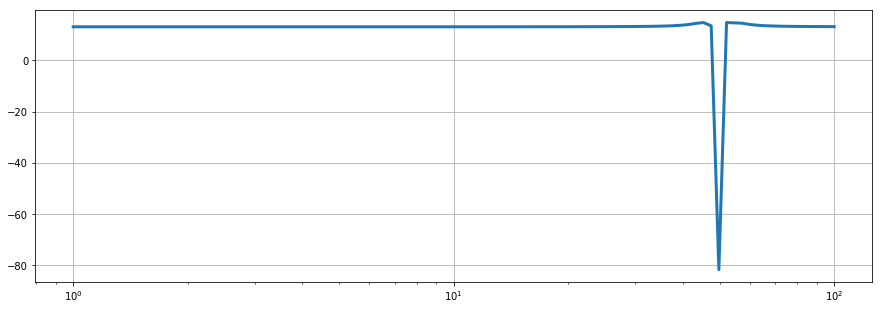

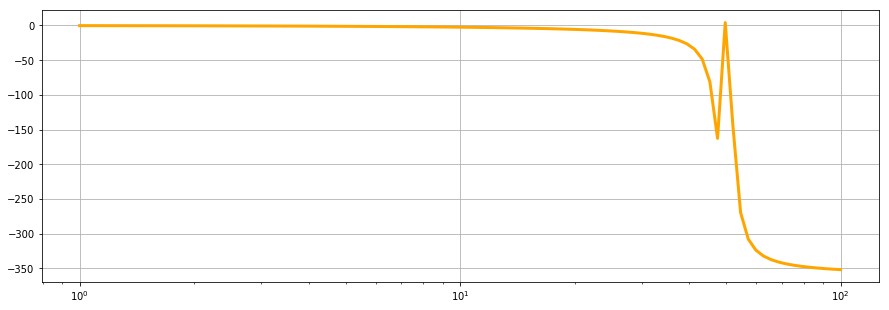

In [20]:
sy = signal.lti( b,a )
freqs_bode(sy)

In [ ]:
sr   = 500.
fc   = 2*sr*np.tan( wp/(sr*2) ) 
H    = sym.cancel( (1/den).subs({ s:2*fc*((z-1)/(z+1)) })  )
b, a = sym.fraction(H)
print( '{} // {}'.format(b,a) )

In [ ]:
b = np.array(  poly( b ).all_coeffs()  ).astype('float')
a = np.array(  poly( a ).all_coeffs()  ).astype('float')

print( '{} // {}'.format(b,a) )
fc

In [ ]:
w, W, H, = freqz_plot(b[::-1],a[::-1],sr)

plt.figure(u'Respuesta en frecuencia dB',figsize=(12,5))
plt.plot(w,H,'b',linewidth=3)
plt.grid(True)
plt.figure(u'Respuesta en frecuencia Hz',figsize=(12,5))
plt.plot(w,W,'g',linewidth=3)
plt.grid(True)
plt.show()

In [ ]:
wt  = np.linspace(0.001,1.1,200)
tn = np.array(  [ X[0].subs({'w':i}) for i in wt ]   )

plt.figure(figsize=(12,5))
plt.plot(wt,tn,color='green',linewidth=3)
plt.grid(True)

In [ ]:
eps = 0.1

H = 1/(1 + (eps*tn)**2 )

plt.figure(figsize=(12,5))
plt.plot(wt,H,color='green',linewidth=3)
plt.grid(True)

In [ ]:
N   = 5
eps = .1

k = np.arange(1,N+1)

sg_k = -np.sin( (2*k-1.)*np.pi/(2*N) )*np.sinh( 1./N*np.arcsinh(1./eps) )
w_k  =  np.cos( (2*k-1.)*np.pi/(2*N) )*np.cosh( 1./N*np.arcsinh(1./eps) )

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(sg_k,w_k,'o',markersize=10)
plt.grid(True)
plt.axes().set_aspect('equal', 'datalim')

In [ ]:
l = int(sg_k.shape[0]/2)
B = -2*sg_k
W = sg_k**2 + w_k**2

for i,j in zip(B,W):
    print ('S**2 +{:5.4f} S + {:5.4f}'.format(i,j))

In [ ]:
n   = 6
k   = np.arange(1,2*n+1)
eps = .1

G = (  1 + np.sqrt( 1 + eps**2 )/eps  )
G = G**(1./n)

r0 = ( G**2 + 1 )/(2*G)
r1 = ( G**2 - 1 )/(2*G)

print ('r0={:6.4f}, r1={:6.4f}'.format(r0,r1))

p  = np.pi*(2*k + n - 1 )/(2*n)

plt.figure(figsize=(6,6))
plt.plot(  r1*np.cos(p),r0*np.sin(p),'ro',markersize=15 )
#plt.plot( -r1*np.sin(p),r0*np.cos(p),'ko',markersize=9 )
plt.plot(  r0*np.cos(p),r0*np.sin(p),'go',markersize=10 )
plt.plot(  r1*np.cos(p),r1*np.sin(p),'bo',markersize=10 )
plt.axes().set_aspect('equal', 'datalim')
plt.grid(True)
plt.show() 

In [ ]:
n   = 8
k   = np.arange(1,n+1)
eps = .01

G = (  1 + np.sqrt( 1 + eps**2 )/eps  )
G = G**(1./n)

r0 = ( G**2 + 1 )/(2*G)
r1 = ( G**2 - 1 )/(2*G)

p  = np.pi*(2*k + n - 1 )/(2*n)

S = sym.symbols('S')

A, B = r1*np.cos(p),r0*np.sin(p)
Pk   = []
l    = int( n/2 )
for i,j in zip( A[:l],B[:l] ):
    pk = (S -i-1j*j)*(S -i+1j*j)
    Pk.append(pk)
    print ( pk ).expand()

if n%2!=0:
    print ('polo real: {:6.4f}'.format( -A[l]) )
    Pk.append(S-A[l])


In [ ]:
w  = np.linspace( 0,4,1000 )
p2 = 2*w**2 - 1
p4 = 8*w**4 - 8*w**2 + 1
e = .5

H2 = 1/( 1+e**2*p2**2 )
H4 = 1/( 1+e**2*p4**2 )

plt.figure(figsize=(12,6))
plt.plot( w,H2, 'r', linewidth=3 )
plt.plot( w,H4, 'b', linewidth=3 )
plt.grid(True)
plt.show()

In [ ]:
w  = np.linspace( 0,4,1000 )
p3 = 4*w**3  - 3*w
p5 = 16*w**5 - 20*w**3 + 5*w
e = .3

H3 = 1/( 1+e**2*p3**2 )
H5 = 1/( 1+e**2*p5**2 )

plt.figure(figsize=(12,6))
plt.plot( w,H3, 'r', linewidth=3 )
plt.plot( w,H5, 'b', linewidth=3 )
plt.grid(True)
plt.show()

In [ ]:
w  = np.linspace( 0.0001,5,1000 )
wt = w
p5 = 16*wt**5 - 20*wt**3 + 5*wt
e1 = .1
e2 = .3

H5_1 = 1/( 1+e1**2*p5**2 )
H5_2 = 1/( 1+e2**2*p5**2 )

plt.figure(figsize=(12,6))
plt.plot( w,H5_1, 'r', linewidth=3 )
plt.plot( w,H5_2, 'b', linewidth=3 )
plt.grid(True)
plt.show()